-[test](#test) 

In [80]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [81]:
from __future__ import division
import hashlib

In [100]:
def TestPlot(T, I_0, sigma, tau_ms, sampling_freq):
    """
    ToDo:
    """
    
    I = OU_current(T=T, I_0=I_0, sigma=sigma, tau=tau_ms*1e-3, sampling_freq=sampling_freq)
    
    plt.plot(np.linspace(0,T,sampling_freq*T),I)
    print 'Mean Current:', I.mean(), 'pA','Standard Deviaton:' , I.std(),'pA' #okay
    xlabel('Time [s]')
    ylabel('I [pA]')


In [106]:
def save_stim(T, I_0, sigma, tau_ms, sampling_freq):
    
    filename = 'I_noise_I0_{}pA_sigma_{}pA_T{}s.'.format(I_0,sigma,T)
    I = OU_current(T=T, I_0=I_0, sigma=sigma, tau=tau_ms*1e-3, sampling_freq=sampling_freq) #in pA

    #get the command voltage (convert the current in pA to mV) 
    I_mV = 1e-3*I
    
    filename += hashlib.md5(I_mV).hexdigest()
    filename += '.tpl'
    print filename
    # store the values in pA to a binary file
    (I_mV).astype('f4').tofile(filename)

In [102]:
def OU_current(T,I_0=0,sigma=1,tau=0.003, sampling_freq=20000.):
    '''
    T : gives the simulation time in seconds
    other parameters as in Pozzorini et al 2015
    '''
    DeltaT = 1/sampling_freq
    def DeltaI(I):

        return (I_0-I)*DeltaT/tau + np.sqrt(2*sigma**2*DeltaT/tau)*randn()
    
    I = np.zeros(int(T/DeltaT))
    I[0] = I_0 #set the initial value to the mean input
    
    for i in xrange(1,len(I)):
        I[i] = I[i-1]+DeltaI(I[i-1])
        
    return I


# test 

### Welcome to the Noise Stimulus Generator Notebook

The following parameters are taken as inputs:

$T$ - the length of the stimulus in seconds

$I_{0}$ - the mean input current in pA

$\sigma $ - the standard deviation of the input current in pA

$f$ - the sampling frequency in kHz

The notebook outputs:

- a plot of the noise stimulus

- a binary stimulus file



#### Please enter the input parameters below:

In [117]:
# Run this cell to save the stimulus file with given parameters


I_0 = 500 #mean input current (pA)

T = 10 #length of stimulus required (s)

sigma = 100 #standard deviation (pA)

SamplingFreq = 20000 # sampling frequency (kHz)

tau = 3 #time constant (ms)

save_stim(T,I_0,sigma,tau,SamplingFreq)

I_noise_I0_500pA_sigma_100pA_T10s.c3e3697781cb8754d72f2c5a627b5e79.tpl


Mean Current: 497.18977045 pA Standard Deviaton: 101.811486581 pA


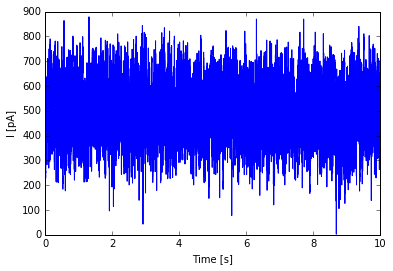

In [104]:
TestPlot(T,I_0,sigma,tau,SamplingFreq)


Export stimulation current to TPL file (patchmaster)
>Template Files for stimulation can be used in Voltage Clamp and in Current Clamp mode. In Current Clamp
mode, the stimulation data is defined in volts, where 1 mV corresponds with 1 pA current injection.
Example: A value of 0.1 would result in a current injection of 100 pA.

In [109]:
#test the files
filename= 'I_noise_I0_500pA_sigma_100pA_T10s.fb91109837e9befc596aad99ebf2dd53.tpl'


A = fromfile(filename, dtype='f4')*1e3

print "mean={}pA, sigma={}pA".format(round(A.mean(),2), round(A.std(),2))

mean=501.38pA, sigma=102.01pA


In [110]:
md5sum

NameError: name 'md5sum' is not defined